In [1]:
# STEP 1
# IMPORT SIMON P&L2022

import pandas as pd
import numpy as np
from statsmodels.robust.scale import mad

#import the file with raw data
simonProfitAndLoss_df = pd.read_csv('Simon2022_ProfitAndLoss.csv', sep=";", header = None, skiprows=[0],names=["Date", "PaL", "PaL Sum"])

simonProfitAndLoss_df['Date'] = pd.to_datetime(simonProfitAndLoss_df['Date'], infer_datetime_format=True)


#add id to each row starting from 0
#simonProfitAndLoss_df['id'] = pd.RangeIndex(0, len(simonProfitAndLoss_df)) + 1

#replace "," for "." for conversion
simonProfitAndLoss_df['PaL'] = simonProfitAndLoss_df['PaL'].apply(lambda x: float(x.split()[0].replace(',', '.')))
#convert to integer
simonProfitAndLoss_df['PaL'] = simonProfitAndLoss_df['PaL'].astype(int)

#replace "," for "." for conversion
simonProfitAndLoss_df['PaL Sum'] = simonProfitAndLoss_df['PaL Sum'].apply(lambda x: float(x.split()[0].replace(',', '.')))
#convert to integer
simonProfitAndLoss_df['PaL Sum'] = simonProfitAndLoss_df['PaL Sum'].astype(int)
simonProfitAndLoss_df = simonProfitAndLoss_df.drop('PaL Sum', axis=1)



with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(simonProfitAndLoss_df)

          Date     PaL
0   2022-01-19  -12819
1   2022-01-20  -20627
2   2022-01-21   23042
3   2022-01-24  -24837
4   2022-01-25  -48159
5   2022-01-26   73728
6   2022-01-27   23055
7   2022-01-28   57450
8   2022-01-31    7954
9   2022-02-01   15859
10  2022-02-02    3489
11  2022-02-03 -134246
12  2022-02-04    8896
13  2022-02-07  -46883
14  2022-02-08   30586
15  2022-02-09  -20987
16  2022-02-10    8875
17  2022-02-11  -11646
18  2022-02-14  -10941
19  2022-02-15  102306
20  2022-02-16   51444
21  2022-02-17   10512
22  2022-02-21   97023
23  2022-02-22  -37658
24  2022-02-23  -46980
25  2022-02-24  119642
26  2022-02-25  -73963
27  2022-02-28   84012
28  2022-03-01   24737
29  2022-03-02   69716
30  2022-03-03  -33979
31  2022-03-04   21071
32  2022-03-07  -72228
33  2022-03-08  122540
34  2022-03-09   21840
35  2022-03-10   60620
36  2022-03-14   30812
37  2022-03-15   47550
38  2022-03-16  -15094
39  2022-03-23    9406
40  2022-03-24   83027
41  2022-03-25  -19768
42  2022-03

        Date  Withdraw
0 2022-04-05   -150000
1 2022-05-06   -200000
2 2022-08-01   -100000
3 2022-09-08   -100000
4 2022-09-23   -100000
5 2022-09-29   -250000
6 2022-10-17   -250000
7 2022-11-08   -250000


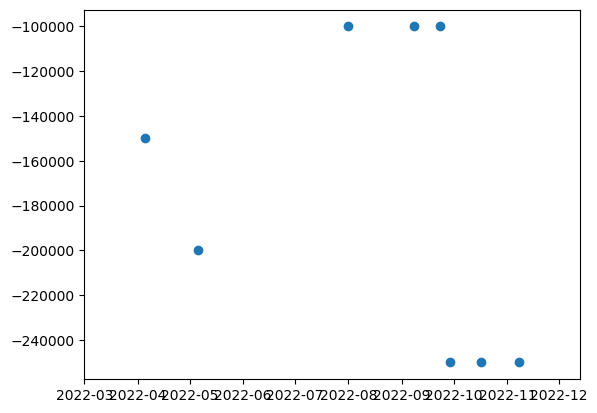

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>
          Date     PaL   Withdraw  PaLAndWithdraw    PaL Sum  PaL SumWW
0   2022-01-19  -12819       0.00       -12819.00  486599.00     486599
1   2022-01-20  -20627       0.00       -20627.00  465972.00     465972
2   2022-01-21   23042       0.00        23042.00  489014.00     489014
3   2022-01-24  -24837       0.00       -24837.00  464177.00     464177
4   2022-01-25  -48159       0.00       -48159.00  416018.00     416018
5   2022-01-26   73728       0.00        73728.00  489746.00     489746
6   2022-01-27   23055       0.00        23055.00  512801.00     512801
7   2022-01-28   57450       0.00        57450.00  570251.00     570251
8   2022-01-31    7954       0.00         7954.00  578205.00     578205
9   2022-02-01   15859       0.00        15859.00  594064.00     594064
10  2022-02-02    3489       0.00         3489.00  597553.00     597553
11  2022-02-03 -134246       0.00      -134246.00  463307.00   

In [21]:
# STEP 2
# CREATE WITHDRAW BALANCES AND MERGE THEM WITH MAIN DATAFRAME



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

withdraw_df = pd.DataFrame(np.array([['2022-04-05', -150000], 
                                     ['2022-05-06', -200000],
                                     ['2022-08-01',-100000],
                                     ['2022-09-08',-100000],
                                     ['2022-09-23',-100000],
                                     ['2022-09-29',-250000],
                                     ['2022-10-17',-250000],
                                     ['2022-11-08',-250000]]),columns=['Date', 'Withdraw'])


withdraw_df['Date'] = pd.to_datetime(withdraw_df.Date)

withdraw_df['Withdraw'] = withdraw_df['Withdraw'].astype(int)

print (withdraw_df)

plt.scatter(withdraw_df['Date'].tolist(), withdraw_df['Withdraw'])
plt.show()


newdate1 = simonProfitAndLoss_df['Date'][0]
print (type(newdate1))


newdate = withdraw_df['Withdraw'][0]
print (type(newdate))


df = pd.merge(simonProfitAndLoss_df, withdraw_df, how='outer', on='Date')

df['Withdraw'] = df['Withdraw'].fillna(0)

df ['PaLAndWithdraw'] = df ['PaL'] + df ['Withdraw']


#starting balance at the beginning of 2022
startingBalance2022 = 499418
df['PaL Sum'] = df['PaLAndWithdraw'].cumsum() + startingBalance2022

#PaL sum without withdraw
df['PaL SumWW'] = df['PaL'].cumsum() + startingBalance2022


simonProfitAndLoss_df = df


with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(simonProfitAndLoss_df)
    


In [35]:
#STEP 3
#CALCULATE ADDITIONAL VARIABLES: PctDif / PaL Abv and Blw Count / CumMaxCount

#%difference
simonProfitAndLoss_df['PctDif'] = (simonProfitAndLoss_df['PaL Sum'] / simonProfitAndLoss_df['PaL Sum'].shift().astype(float)-1)*100
pd.options.display.float_format = '{:.2f}'.format

simonProfitAndLoss_df['PctDifCumSum'] = simonProfitAndLoss_df['PctDif'].cumsum()

simonProfitAndLoss_df['PctDifWW'] = (simonProfitAndLoss_df['PaL SumWW'] / simonProfitAndLoss_df['PaL SumWW'].shift().astype(float)-1)*100
pd.options.display.float_format = '{:.2f}'.format

simonProfitAndLoss_df['PctDifCumSumWW'] = simonProfitAndLoss_df['PctDifWW'].cumsum()

#define streak, streak is defined as consecutive 
#define count above and below
simonProfitAndLoss_df['PaLAbv'] = np.where(simonProfitAndLoss_df['PaL'] > 0, 1, 0)
simonProfitAndLoss_df['PaLBlw'] = np.where(simonProfitAndLoss_df['PaL'] < 0, 1, 0)

#cumsum cumcount above and below
simonProfitAndLoss_df['PaLAbvCount'] = simonProfitAndLoss_df.groupby(simonProfitAndLoss_df['PaLAbv'].eq(0).cumsum()).cumcount()
simonProfitAndLoss_df['PaLBlwCount'] = simonProfitAndLoss_df.groupby(simonProfitAndLoss_df['PaLBlw'].eq(0).cumsum()).cumcount()


#identify cumulative interim maximum to identify peaks
simonProfitAndLoss_df ['CumMax'] = simonProfitAndLoss_df['PaL Sum'].cummax()
                 
#now find blocks that are higher then previous, mark them as 1 and then count the day difference. If 1, calc the date difference
simonProfitAndLoss_df['CumMaxTrue'] = np.where(simonProfitAndLoss_df['CumMax'] > simonProfitAndLoss_df['CumMax'].shift(), 0, 1 )

#now just count how many sessions it took to reach to new highs
simonProfitAndLoss_df['CumMaxTrueCount'] = simonProfitAndLoss_df.groupby(simonProfitAndLoss_df['CumMaxTrue'].eq(0).cumsum()).cumcount()

    
    
#experimental block with useful variables
idvar = 10

idvar_pal = simonProfitAndLoss_df.loc[idvar]['PaL']
idvar_PaLAbvCount = simonProfitAndLoss_df.loc[idvar]['PaLAbvCount'] 
idvar_PaLBlwCount = simonProfitAndLoss_df.loc[idvar]['PaLBlwCount'] 

if (idvar_PaLAbvCount > idvar_PaLBlwCount):
    streak = "Up"
else: 
    streak = "Down"
        
median = mad(simonProfitAndLoss_df['PaL'], c=1)
averagewin = int (simonProfitAndLoss_df.loc[simonProfitAndLoss_df['PaL'] > 0, 'PaL'].mean())
averageloss = int(simonProfitAndLoss_df.loc[simonProfitAndLoss_df['PaL'] < 0, 'PaL'].mean())
maxloss = int (simonProfitAndLoss_df['PaL'].min())
maxwin = int (simonProfitAndLoss_df['PaL'].max())

print (idvar_pal, idvar_PaLAbvCount, idvar_PaLBlwCount, streak, median, averagewin, averageloss, maxloss, maxwin)




with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(simonProfitAndLoss_df)
    


3489 6 0 Up 54286.0 74874 -71766 -316324 389781
          Date     PaL   Withdraw  PaLAndWithdraw    PaL Sum  PaL SumWW  \
0   2022-01-19  -12819       0.00       -12819.00  486599.00     486599   
1   2022-01-20  -20627       0.00       -20627.00  465972.00     465972   
2   2022-01-21   23042       0.00        23042.00  489014.00     489014   
3   2022-01-24  -24837       0.00       -24837.00  464177.00     464177   
4   2022-01-25  -48159       0.00       -48159.00  416018.00     416018   
5   2022-01-26   73728       0.00        73728.00  489746.00     489746   
6   2022-01-27   23055       0.00        23055.00  512801.00     512801   
7   2022-01-28   57450       0.00        57450.00  570251.00     570251   
8   2022-01-31    7954       0.00         7954.00  578205.00     578205   
9   2022-02-01   15859       0.00        15859.00  594064.00     594064   
10  2022-02-02    3489       0.00         3489.00  597553.00     597553   
11  2022-02-03 -134246       0.00      -134246.00  4

In [36]:
#STEP 4
#CREATE CPI AND NFP DATAFRAME

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

economicData_df = pd.DataFrame(np.array([
                                     ['2022-01-12', "CPI","Economic data"], 
                                     ['2022-02-10', "CPI","Economic data"],
                                     ['2022-03-10', "CPI","Economic data"],
                                     ['2022-04-12', "CPI","Economic data"],
                                     ['2022-05-11', "CPI","Economic data"],
                                     ['2022-06-10', "CPI","Economic data"],
                                     ['2022-07-13', "CPI","Economic data"],
                                     ['2022-08-10', "CPI","Economic data"],
                                     ['2022-09-13', "CPI","Economic data"],
                                     ['2022-10-13', "CPI","Economic data"],
                                     ['2022-11-10', "CPI","Economic data"],
                                     ['2022-01-07', "NFP","Economic data"], 
                                     ['2022-02-04', "NFP","Economic data"],
                                     ['2022-03-04', "NFP","Economic data"],
                                     ['2022-04-01', "NFP","Economic data"],
                                     ['2022-05-06', "NFP","Economic data"],
                                     ['2022-06-03', "NFP","Economic data"],
                                     ['2022-07-08', "NFP","Economic data"],
                                     ['2022-08-05', "NFP","Economic data"],
                                     ['2022-09-02', "NFP","Economic data"],
                                     ['2022-10-07', "NFP","Economic data"],
                                     ['2022-11-04', "NFP","Economic data"]]),columns=['Date', 'News', 'Event'])


economicData_df['Date'] = pd.to_datetime(economicData_df.Date)

print (economicData_df)

         Date News          Event
0  2022-01-12  CPI  Economic data
1  2022-02-10  CPI  Economic data
2  2022-03-10  CPI  Economic data
3  2022-04-12  CPI  Economic data
4  2022-05-11  CPI  Economic data
5  2022-06-10  CPI  Economic data
6  2022-07-13  CPI  Economic data
7  2022-08-10  CPI  Economic data
8  2022-09-13  CPI  Economic data
9  2022-10-13  CPI  Economic data
10 2022-11-10  CPI  Economic data
11 2022-01-07  NFP  Economic data
12 2022-02-04  NFP  Economic data
13 2022-03-04  NFP  Economic data
14 2022-04-01  NFP  Economic data
15 2022-05-06  NFP  Economic data
16 2022-06-03  NFP  Economic data
17 2022-07-08  NFP  Economic data
18 2022-08-05  NFP  Economic data
19 2022-09-02  NFP  Economic data
20 2022-10-07  NFP  Economic data
21 2022-11-04  NFP  Economic data


In [37]:
#STEP 5
#IMPORT NEWS CSV WITH CENTRAL BANK EVENTS


import pandas as pd
import numpy as np

#import the file with raw data
#EcoData
#CentralBanks2022
news_df = pd.read_csv('CentralBanks2022.csv', sep=";", header = None, skiprows=[0],names=["Date", "News"])


#convert string time to datetime
#introduce infer_datetime_format variable in pd.to_datetime
news_df['Date'] = pd.to_datetime(news_df['Date'], infer_datetime_format=True)
news_df['Event'] = "Central Bank"



newDf = news_df.append(economicData_df)

news_df = newDf.reset_index(drop=True)


print (news_df)

         Date  News          Event
0  2022-01-18   BOJ   Central Bank
1  2022-01-26  FOMC   Central Bank
2  2022-02-03   BOE   Central Bank
3  2022-02-03   ECB   Central Bank
4  2022-03-10   ECB   Central Bank
5  2022-03-16  FOMC   Central Bank
6  2022-03-17   BOE   Central Bank
7  2022-03-18   BOJ   Central Bank
8  2022-04-14   ECB   Central Bank
9  2022-04-28   BOJ   Central Bank
10 2022-05-04  FOMC   Central Bank
11 2022-05-05   BOE   Central Bank
12 2022-06-09   ECB   Central Bank
13 2022-06-15  FOMC   Central Bank
14 2022-06-16   BOE   Central Bank
15 2022-06-17   BOJ   Central Bank
16 2022-07-21   ECB   Central Bank
17 2022-07-21   BOJ   Central Bank
18 2022-07-27  FOMC   Central Bank
19 2022-08-04   BOE   Central Bank
20 2022-09-08   ECB   Central Bank
21 2022-09-21  FOMC   Central Bank
22 2022-09-22   BOE   Central Bank
23 2022-09-22   BOJ   Central Bank
24 2022-10-27   ECB   Central Bank
25 2022-10-28   BOJ   Central Bank
26 2022-11-02  FOMC   Central Bank
27 2022-11-03   BOE 

In [38]:
#STEP 6
#Merge SimonDF and NewsDf

merged_df = pd.merge (simonProfitAndLoss_df,news_df, how='outer', on='Date')



with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(merged_df)
    


          Date        PaL   Withdraw  PaLAndWithdraw    PaL Sum  PaL SumWW  \
0   2022-01-19  -12819.00       0.00       -12819.00  486599.00  486599.00   
1   2022-01-20  -20627.00       0.00       -20627.00  465972.00  465972.00   
2   2022-01-21   23042.00       0.00        23042.00  489014.00  489014.00   
3   2022-01-24  -24837.00       0.00       -24837.00  464177.00  464177.00   
4   2022-01-25  -48159.00       0.00       -48159.00  416018.00  416018.00   
5   2022-01-26   73728.00       0.00        73728.00  489746.00  489746.00   
6   2022-01-27   23055.00       0.00        23055.00  512801.00  512801.00   
7   2022-01-28   57450.00       0.00        57450.00  570251.00  570251.00   
8   2022-01-31    7954.00       0.00         7954.00  578205.00  578205.00   
9   2022-02-01   15859.00       0.00        15859.00  594064.00  594064.00   
10  2022-02-02    3489.00       0.00         3489.00  597553.00  597553.00   
11  2022-02-03 -134246.00       0.00      -134246.00  463307.00 

In [162]:
import random


def searchForStatistics(idvar):


    idvar_pal = simonProfitAndLoss_df.loc[idvar]['PaL']
    idvar_PaLAbvCount = simonProfitAndLoss_df.loc[idvar]['PaLAbvCount'] 
    idvar_PaLBlwCount = simonProfitAndLoss_df.loc[idvar]['PaLBlwCount'] 

    if (idvar_PaLAbvCount > idvar_PaLBlwCount):
        streak = "Up"
    else: 
        streak = "Down"

        
    if (streak == "Up"):
        resultStreakCount = idvar_PaLAbvCount
    else:
        resultStreakCount = idvar_PaLBlwCount
        
    #when was the last peak
        
    
    median = mad(simonProfitAndLoss_df['PaL'], c=1)

    averagewin = int (simonProfitAndLoss_df.loc[simonProfitAndLoss_df['PaL'] > 0, 'PaL'].mean())
    averageloss = int(simonProfitAndLoss_df.loc[simonProfitAndLoss_df['PaL'] < 0, 'PaL'].mean())
    maxloss = int (simonProfitAndLoss_df['PaL'].min())
    maxwin = int (simonProfitAndLoss_df['PaL'].max())
    
    #to programme
    drawdownaheadalert = 'High'
    lastPeak = random.randint(0, 15)

    
    
    output = [streak, resultStreakCount, drawdownaheadalert, lastPeak]



    '''
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.precision', 3,
                           ):
        print(simonProfitAndLoss_df)
    '''
    
    return output


#RUN SEARCH METHOD
#x = searchForStatistics(10)
#print the output
#print(f" Streak: {x[0]}\n Streak Count: {x[1]}\n Drawdown Alert: {x[2]}\n Last Peak: {x[3]} days ago")


    
#SEARCH FUNCTION

def runSearch():
    while True:
        try:
            programme = input ("Choose program to run: search[S] or exit[E]?\n")


            if (programme == "s"):
                routine = int(input ("Search by id:"))
                output = searchForStatistics (routine)
                print(f" Streak: {output[0]}\n Streak Count: {output[1]}\n Drawdown Alert: {output[2]}\n Last Peak: {output[3]} days ago")



            if programme == "e":
                break
                print("Exiting programme")
        except Exception as e:

            print(e)



In [50]:
#STEP 7
#Build visual representation of all the data

import pandas as pd
from math import pi
from bokeh.layouts import column
from datetime import datetime as dt
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import ColumnDataSource
import numpy as np
from bokeh.models import HoverTool


from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap

# prepare some data for location of the circle
y3 = [-1, -1, -1]

def showDataframe (dataframe):

    
    #defining input dataframe as a source so that hoover tooltip works
    source = ColumnDataSource(dataframe)
    
    #creating new column color based on which the color is then selected
    dataframe['color'] = np.where(dataframe['PaL'] > 0, 'green', 'red')
    
    #creating better ratio between prices and the P&L curve
    dataframe['PaLSumDivided'] = dataframe['PaL Sum'] / 10
    
    #hacking the dataframe by changing the integer to string :)
    dataframe['PaLSumString'] = dataframe['PaL Sum'].astype(str)
    
    dataframe['DateToString'] = dataframe['Date'].astype(str)
    
    #create index for future search
    dataframe['Index'] = dataframe.index
    
    print (dataframe)

    
    #adding hover capability    
    hover = HoverTool(
    tooltips = [
        ("Index", "@Index"),
        ("Date", "@DateToString"),
        ("P&L", "@PaL"),
        ("Sum", "@PaLSumString"),
        ("News", "@News"),
        
    ]
    )
    
    
    hoverPct = HoverTool(
    tooltips = [
        ("Index", "@Index"),
        ("Date", "@DateToString"),
        ("P&L", "@PaL"),
        ("%DifW", "@PctDifCumSum"),
        ("%DifWW", "@PctDifCumSumWW"),
        
    ]
    )
    
    

    #create new dataframe that does not containt NaN rows
    dfWithoutNews = dataframe[dataframe['News'].notna()]
    dfWithoutNews['DateToString'] = dfWithoutNews['Date'].astype(str)
    
    #create dataframe that consists only certain rows, so that I can plot it in bokeh, need x = date, and y = PaL
    dfNewsEconomicEvents = dfWithoutNews[['Date','DateToString','PaLSumString','Index', 'PaL', 'News','Event']].copy()
    
    dfNewsCentralBank = dfWithoutNews[['Date','DateToString','PaLSumString','Index', 'PaL', 'News','Event']].copy()
    
    #move PaL higher so that it does not colide in location with previous news
    dfNewsEconomicEvents ['PaL'] = dfNewsEconomicEvents ['PaL']  + 10000
    
    #filter only data that have Economic character like CPI
    dfNewsEconomicEvents1 = dfNewsEconomicEvents[dfNewsEconomicEvents['Event'].str.startswith('Economic data', na=False)]
    dfNewsCentralBank1 = dfNewsCentralBank[dfNewsCentralBank['Event'].str.startswith('Central Bank', na=False)]
    
    
    #introduce fiture where tooltips define tooltip
    c1 = figure(title="P&L Plot", x_axis_label="Date", y_axis_label="P&L",plot_width=1000, tools=[hover])
               #tooltips=TOOLTIPS)
   
    #disable scientific fucking of my y scale
    c1.left[0].formatter.use_scientific = False

    
    #width 24*60*60*1000

    c1.vbar(x = dataframe.Date,top = dataframe['PaL'], width=1, bottom=0, color=dataframe['color'])

    
    #print news on c1 canvas
    c1.circle(source = dfNewsCentralBank1, x='Date', y='PaL', color="blue", size=5)
    c1.square(source = dfNewsEconomicEvents1, x='Date', y=0, color="red", size=5)
    
    
    
    c1.line(x='Date', y='PaLSumDivided', line_color='blue', line_width=2, source=source)
    
    #p.triangle(source = dfWithVIX, x='Date', y='PL', color="red", size=15)

    

    c1.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
  

    
    c1.ray(x=dataframe.Date, y=[150000], length=0, angle=0, line_width=1, color='blue')
    c1.ray(x=dataframe.Date, y=[-150000], length=0, angle=0, line_width=1, color='red')
    
    
    c2 = figure(title="Positive Streak", y_axis_label="PositiveCount",plot_width=1000,plot_height=200, tools=[hover])
    c2.vbar(x = dataframe.Date,top = dataframe['PaLAbvCount'], width=1, bottom=0, color='green')
    c2.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
    
    
    c3 = figure(title="Negative Streak", y_axis_label="NegativeCount",plot_width=1000,plot_height=200, tools=[hover])
    c3.vbar(x = dataframe.Date,top = dataframe['PaLBlwCount'], width=1, bottom=0, color='red')
    c3.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
    
    
    c4 = figure(title="% Difference", y_axis_label="%",plot_width=1000,plot_height=200, tools=[hover])
    c4.vbar(x = dataframe.Date,top = dataframe['PctDif'], width=1, bottom=0, color=dataframe['color'])
    c4.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
    
    c6 = figure(title="% Return", x_axis_label="Date", y_axis_label="% Return",plot_width=1000, tools=[hoverPct])
    c6.line(x='Date', y='PctDifCumSumWW', line_color='blue', line_width=2, source=source)
    c6.line(x='Date', y='PctDifCumSum', line_color='red', line_width=2, source=source)
    c6.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
    
    c5 = figure(title="Sessions To New Peak", y_axis_label="NumberOfSessions",plot_width=1000,plot_height=200, tools=[hover])
    c5.vbar(x = dataframe.Date,top = dataframe['CumMaxTrueCount'], width=1, bottom=0, color='purple')
    c5.xaxis.formatter=DatetimeTickFormatter(
            hours=["%b %Y"],
            days=["%b %Y"],
            months=["%b %Y"],
            years=["%b %Y"],
        )
    

    #output_notebook() 

    show(column(c1, c2, c3, c4, c6, c5))
    

In [51]:
showDataframe (merged_df)

          Date       PaL  Withdraw  PaLAndWithdraw   PaL Sum  PaL SumWW  \
0   2022-01-19 -12819.00      0.00       -12819.00 486599.00  486599.00   
1   2022-01-20 -20627.00      0.00       -20627.00 465972.00  465972.00   
2   2022-01-21  23042.00      0.00        23042.00 489014.00  489014.00   
3   2022-01-24 -24837.00      0.00       -24837.00 464177.00  464177.00   
4   2022-01-25 -48159.00      0.00       -48159.00 416018.00  416018.00   
..         ...       ...       ...             ...       ...        ...   
169 2022-03-18       nan       nan             nan       nan        nan   
170 2022-01-12       nan       nan             nan       nan        nan   
171 2022-05-11       nan       nan             nan       nan        nan   
172 2022-01-07       nan       nan             nan       nan        nan   
173 2022-06-03       nan       nan             nan       nan        nan   

     PctDif  PaLAbv  PaLBlw  PaLAbvCount  ...  PctDifWW  PctDifCumSum  \
0       nan    0.00    1.0

/Users/jk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [420]:
runSearch()

Choose program to run: search[S] or exit[E]?
s
Search by id:63
 Streak: Up
 Streak Count: 8
 Drawdown Alert: High
 Last Peak: 9 days ago
Choose program to run: search[S] or exit[E]?
e


In [178]:
import pandas as pd
from math import pi
from datetime import datetime as dt
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import ColumnDataSource


p = figure(title="P&L Plot", x_axis_label="Date", y_axis_label="P&L",plot_width=1000)
#p.vbar(x = dataframe.Date,top = dataframe['PaL'], width=1, bottom=0, color="red")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(simonProfitAndLoss_df)


p.vbar(
    source=simonProfitAndLoss_df,
    x='Date',
    top='PaL',
    width=1, bottom=0, color="red"
)

    #define tooltip
    TOOLTIPS = [
        ("P&L", "@PaL"),
        ("date", "@DateToString"),
        ("desc", "@News"),
    ]



#show(p)

          Date     PaL  PaL Sum
0   2022-01-19  -12819   -12819
1   2022-01-20  -20627   -33446
2   2022-01-21   23042   -10404
3   2022-01-24  -24837   -35241
4   2022-01-25  -48159   -83401
5   2022-01-26   73728    -9672
6   2022-01-27   23055    13382
7   2022-01-28   57450    70832
8   2022-01-31    7954    78787
9   2022-02-01   15859    94646
10  2022-02-02    3489    98135
11  2022-02-03 -134246   -36111
12  2022-02-04    8896   -27214
13  2022-02-07  -46883   -74098
14  2022-02-08   30586   -43511
15  2022-02-09  -20987   -64499
16  2022-02-10    8875   -55623
17  2022-02-11  -11646   -67269
18  2022-02-14  -10941   -78211
19  2022-02-15  102306    24094
20  2022-02-16   51444    75538
21  2022-02-17   10512    86051
22  2022-02-21   97023   183074
23  2022-02-22  -37658   145415
24  2022-02-23  -46980    98435
25  2022-02-24  119642   218078
26  2022-02-25  -73963   144115
27  2022-02-28   84012   228127
28  2022-03-01   24737   252864
29  2022-03-02   69716   322580
30  2022

GlyphRenderer(id='35761', ...)

In [83]:
#TOOLTIP EXAMPLE

from bokeh.plotting import ColumnDataSource, figure, output_file, show

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = figure(width=400, height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [ ]:
# FAKE DATAFRAME WITH MATPLOTLIB
# 1.csv build P&L with date and P&L (+ and -) [2 variables]
# 2.csv apply import of Date and Economic Data and Result [3 variables]


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.array([['2022-09-09', 2,'NFP'], ['2022-08-08', 5, ''],['2022-06-06',12,'CPI']]),columns=['Date', 'PL','News'])
df['Date'] = pd.to_datetime(df.Date)

#replace empty string for np.nan
df['News'].replace('', np.nan, inplace=True)

print (df)

plt.scatter(df['Date'].tolist(), df['PL'])
plt.show()





In [ ]:
#FAKE P&L DATAFRAME
#create a dataframe that generates P&L daily

np.random.seed(2022)
N = 50

#define range and insert into index using the pd.date_range (starting date, frequency, periods)
rng = pd.date_range('2022-01-01', freq='D', periods=N)
#create dataframe using the pd.DataFrame
profit_df = pd.DataFrame(np.random.randint(low=-5000, high=10000, size=(N, 1)), 
                  columns=['PL'], 
                  index=rng)

#reset dataframe and create a new column for Date
profit_df = profit_df.rename_axis('Date').reset_index()

profit_df ['PLCumSum'] = profit_df.PL.cumsum()

print (profit_df)



In [ ]:
#FAKE META VIX

import pandas as pd


#generate metadata dataframe

df_meta = pd.DataFrame(np.array([['2022-01-02', 30,'VIX > 30'], ['2022-01-15', 30, 'VIX > 30'],['2022-01-26',30,'VIX > 30']]),columns=['Date', 'Value','Message'])
df_meta['Date'] = pd.to_datetime(df_meta.Date)


print (df_meta)

In [ ]:
#MERGE TWO DATAFRAMES into one when you assign profit to news

merged_df = pd.merge (profit_df,news_df, how='outer', on='Date')
merged2_df = pd.merge (merged_df, df_meta, how='outer', on='Date')

print (merged2_df)

In [231]:
#EXTRACTING PDF



# importing required modules 
import PyPDF2 
    
# creating a pdf file object 

#4937R Client Summary 09Nov22
#4937R Client Summary 10Nov22
#4937R Client Summary 11Nov22
#4937R Client Summary 14Nov22


pdfFileObj = open('4937R Client Summary 15Nov22.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
#print(pdfReader.numPages) 
    
# creating a page object 
pageObj = pdfReader.getPage(0) 
    
# extracting text from page 

pdfToText_output = pageObj.extractText()

#print (pdfToText_output)

#define offset, amount of characters from which I will substract from keyword "today"
offset = 25

#find index of the keyword "today"
index_today = pdfToText_output.rfind('today')

#define index to find P&L, by taking the index_today and substracting the buffer (offset)
index_pal = index_today - offset

#return P&L line where there is T and today
targeted_pal = pdfToText_output[index_pal:index_today]

#create substring which starts at T and finishes at (
start = targeted_pal.find('T ')
print (start)
end = targeted_pal.find('(',start+1)
final_pal = targeted_pal[start+1:end]
#print(f"Start: {start}, End: {end}")


#create a substring that starts at .
start1 = final_pal.find('.')

#finalise a substring at the . + 4 znaky
final_pal_today = final_pal [start1+4:]

#need to replace , for nothing so I can convert final P&L to FLOAT
final_pal_today_float = float(final_pal_today.replace(",", "" ))

#final_pal.lstrip(" ")

print (final_pal)
print (final_pal_today_float)
print (type(final_pal_today_float))

# closing the pdf file object 
pdfFileObj.close()

-1
 3,478,638.90 101,077.33
101077.33
<class 'float'>


In [129]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

milk_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv')
time_series = merged_df['PaL Sum']

indices = find_peaks(time_series, threshold=100, prominence = 100000)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [10]:
#google drive test run

from __future__ import print_function

import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']


def main():
    """Shows basic usage of the Drive v3 API.
    Prints the names and ids of the first 10 files the user has access to.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    try:
        service = build('drive', 'v3', credentials=creds)

        # Call the Drive v3 API
        results = service.files().list(
            pageSize=10, fields="nextPageToken, files(id, name)").execute()
        items = results.get('files', [])

        if not items:
            print('No files found.')
            return
        print('Files:')
        for item in items:
            print(u'{0} ({1})'.format(item['name'], item['id']))
    except HttpError as error:
        # TODO(developer) - Handle errors from drive API.
        print(f'An error occurred: {error}')


if __name__ == '__main__':
    main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=696093628847-i5rv92srvcahnsanalvrjc8bq55q63b8.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A53777%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.metadata.readonly&state=SrKk4T2Jr77DRllXR7pc0MtEGF6vWX&access_type=offline
Files:
Money (1uBjWfCT_12RmgGUmqxI5iIQrpOa3fX67rgoSqVcOzKg)
PythonTradingSourceFile (1KAddValMzEes3MKO1inBaCLKv3OgEkQotpPZ3mB1pY0)
Simon (1-WUfAPOQaO3M5iRbw_IHkUXd096x9Qfq)
Trade Idea Tracker - JK Hours (1UCCC-gKbikau4oTvEjPejZo8DK9xIcIix1Qn2-mDfrQ)
Invoice #28 (11wEMI4OBzqEQNH1PrLM-S8BABLUhr9R_5fx7EioTfOo)
Invoice - Carpentum (1qtjMS41o5mxk_eogd1BT67sJpT5RiF_IVLVjc-CvL3I)
MagnetickaRezonance2022.iso (1uLvkiuil9BueJZ3ueQYk-RT7y9uFJXbt)
Statement (1glIg5ly5yhg9Agmbn_fwBsUqdrlz6HXx)
4986R Client Summary 25Nov22.pdf (1SmBlG8qBvpCbTIHAMF1tMEHGcWpJN4Q8)
4986R Client Summary 17Nov22.pdf (1syvv1bPNYJeF_JYyNvEPZ9P9G3cYoyi7)


In [2]:
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

SCOPES = ['https://www.googleapis.com/auth/drive']    
def getContentOfTheFolderFromGoogle():
    creds = None
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    service = build('drive', 'v3', credentials=creds)
    filename = 'Image'
    page_token = None
    while True:
        response = service.files().list(q="parents in '"+ '1glIg5ly5yhg9Agmbn_fwBsUqdrlz6HXx' +"'",
                                              spaces='drive',
                                              fields='nextPageToken, files(id, name)',
                                              pageToken=page_token).execute()
        
        for file in response.get('files', []):
            # Process change
            print('Found file: %s (%s)' % (file.get('name'), file.get('id')))
        page_token = response.get('nextPageToken', None)
        if page_token is None:
            break
    return response


file_response = getContentOfTheFolderFromGoogle()


'''
what I have done?
1) added date attribute
2) converted the time to datetime 
3) compared the date-times
4) printed out the id from the dictionary
'''


Found file: 4986R Client Summary 25Nov22.pdf (1SmBlG8qBvpCbTIHAMF1tMEHGcWpJN4Q8)
Found file: 4986R Client Summary 17Nov22.pdf (1syvv1bPNYJeF_JYyNvEPZ9P9G3cYoyi7)
Found file: 4986R Client Summary 16Nov22.pdf (1v6zpLF4sjsQnbSRBhL8VtPEu9ARj6y5u)


In [2]:
from bokeh.plotting import figure, output_file, show
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
output_file("sine.html")
p = figure(title = "sine wave example", x_axis_label = 'x', y_axis_label = 'y')
p.line(x, y, legend = "sine", line_width = 2)
show(p)